#### The code below cleans a set of laptop sales data

In [105]:
import pandas as pd
laptops = pd.read_csv('laptops.csv', encoding='Latin-1')
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
Manufacturer                1303 non-null object
Model Name                  1303 non-null object
Category                    1303 non-null object
Screen Size                 1303 non-null object
Screen                      1303 non-null object
CPU                         1303 non-null object
RAM                         1303 non-null object
 Storage                    1303 non-null object
GPU                         1303 non-null object
Operating System            1303 non-null object
Operating System Version    1133 non-null object
Weight                      1303 non-null object
Price (Euros)               1303 non-null object
dtypes: object(13)
memory usage: 132.4+ KB


In [106]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [107]:
new_columns = []
for c in laptops.columns:
    clean_c = c.strip()
    new_columns.append(clean_c)
    
laptops.columns = new_columns
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [108]:
# clean the column labels
def clean_col(col):
    col = col.strip()
    col = col.replace('Operating System','os')
    col = col.replace(' ','_')
    col = col.replace('(','')
    col = col.replace(')',"")
    col = col.lower()
    return col
laptops.columns = [clean_col(col) for col in laptops.columns]
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
manufacturer    1303 non-null object
model_name      1303 non-null object
category        1303 non-null object
screen_size     1303 non-null object
screen          1303 non-null object
cpu             1303 non-null object
ram             1303 non-null object
storage         1303 non-null object
gpu             1303 non-null object
os              1303 non-null object
os_version      1133 non-null object
weight          1303 non-null object
price_euros     1303 non-null object
dtypes: object(13)
memory usage: 132.4+ KB


In [109]:
laptops['screen_size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [110]:
laptops['screen_size'] = laptops['screen_size'].str.replace('"','').astype(float)
laptops.rename({'screen_size': 'screen_size_inches'}, axis=1, inplace=True)

In [111]:
laptops['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [112]:
laptops['ram'] = laptops['ram'].str.replace('GB','').astype(int)
laptops.rename({'ram': 'ram_gb'}, axis=1, inplace=True)

In [113]:
laptops['weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [114]:
laptops['weight'] = laptops['weight'].str.replace('kg', '')
laptops['weight'] = laptops['weight'].str.replace('s', '').astype(float)
laptops.rename({'weight':'weight_kg'}, axis=1, inplace=True)
laptops['price_euros'] = laptops['price_euros'].str.replace(',', '.').astype(float)
weight_describe = laptops['weight_kg'].describe()
price_describe = laptops['price_euros'].describe()
print(weight_describe)
print(price_describe)

count    1303.000000
mean        2.038734
std         0.665475
min         0.690000
25%         1.500000
50%         2.040000
75%         2.300000
max         4.700000
Name: weight_kg, dtype: float64
count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: price_euros, dtype: float64


In [115]:
dtypes = laptops.dtypes
print(dtypes)

manufacturer           object
model_name             object
category               object
screen_size_inches    float64
screen                 object
cpu                    object
ram_gb                  int32
storage                object
gpu                    object
os                     object
os_version             object
weight_kg             float64
price_euros           float64
dtype: object


In [116]:
laptops['gpu'].value_counts().head()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
Name: gpu, dtype: int64

In [117]:
# Extract manufacturer data
laptops['gpu_manufacturer'] = laptops['gpu'].str.split(n=1,expand=True).iloc[:,0] 
laptops['cpu_manufacturer'] = laptops['cpu'].str.split(n=1,expand=True).iloc[:,0]                               
print(laptops['gpu_manufacturer'].head())

0    Intel
1    Intel
2    Intel
3      AMD
4    Intel
Name: gpu_manufacturer, dtype: object


In [118]:
laptops['screen'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [119]:
screen_res = laptops['screen'].str.rsplit(n=1, expand=True)
screen_res.columns = ['A', 'B']
screen_res.loc[screen_res['B'].isnull(), 'B'] = screen_res['A']
laptops['screen_resolution'] = screen_res['B']
print(laptops['screen_resolution'].head())

0    2560x1600
1     1440x900
2    1920x1080
3    2880x1800
4    2560x1600
Name: screen_resolution, dtype: object


In [120]:
laptops['cpu_speed_ghz'] = laptops['cpu'].str.replace('GHz', '')
ca_speed=laptops['cpu_speed_ghz'].str.rsplit(n=1, expand=True)
laptops['cpu_speed_ghz'] = ca_speed.iloc[:,1].astype(float)

In [121]:
mapping_dict = {
    'Android': 'Android',
    'Chrome OS': 'Chrome OS',
    'Linux': 'Linux',
    'Mac OS': 'macOS',
    'No OS': 'No OS',
    'Windows': 'Windows',
    'macOS': 'macOS'
}
laptops['os'] = laptops['os'].map(mapping_dict)

In [122]:
laptops_no_null_rows = laptops.dropna()
laptops_no_null_cols = laptops.dropna(axis=1)

In [123]:
value_counts_before = laptops.loc[laptops['os_version'].isnull(), 'os'].value_counts()
laptops.loc[laptops['os'] == 'macOS', 'os_version'] = 'X'
laptops.loc[laptops['os'] == 'No OS', 'os_version'] = 'Version Unknown'
value_counts_after = laptops.loc[laptops["os_version"].isnull(), "os"].value_counts()
print(value_counts_after)

Linux        62
Chrome OS    27
Android       2
Name: os, dtype: int64


In [124]:
laptops['storage'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid',
       '512GB SSD +  1TB Hybrid', '256GB SSD +  1TB Hybrid'], dtype=object)

In [125]:
laptops['storage'] = laptops['storage'].str.replace('Flash Storage', 'Flash_Storage')
sp = laptops['storage'].str.split(expand=True)
laptops['storage_1_capacity_gb'] = sp[0].str.replace('GB', '')
laptops['storage_1_capacity_gb'] = laptops['storage_1_capacity_gb'].str.replace('TB', '000').astype(float)
laptops['storage_1_type'] = sp[1]
laptops['storage_1_type'] = laptops['storage_1_type'].str.replace('Flash_Storage', 'Flash Storage')

laptops['storage_2_capacity_gb'] = sp[3].str.replace('GB', '')
laptops['storage_2_capacity_gb'] = laptops['storage_2_capacity_gb'].str.replace('TB', '000').astype(float)
laptops['storage_2_type'] = sp[4]
laptops['storage_2_type'] = laptops['storage_2_type'].str.replace('Flash_Storage', 'Flash Storage')
laptops = laptops.drop('storage', axis=1)

In [131]:
print(laptops['storage_1_capacity_gb'].unique())
print(laptops['storage_1_type'].unique())
print(laptops['storage_2_capacity_gb'].unique())
print(laptops['storage_2_type'].unique())

[1.28e+02 2.56e+02 5.12e+02 5.00e+02 1.00e+03 3.20e+01 6.40e+01 2.00e+03
 1.60e+01 1.00e+00 2.40e+02 8.00e+00 5.08e+02]
['SSD' 'Flash Storage' 'HDD' 'Hybrid']
[  nan 1000.  256. 2000.  500.  512.]
[None 'HDD' 'SSD' 'Hybrid']


In [ ]:
cols = ['manufacturer', 'model_name', 'category', 'screen_size_inches',
        'screen', 'cpu', 'cpu_manufacturer', 'screen_resolution', 'cpu_speed_ghz', 'ram_gb',
        'storage_1_type', 'storage_1_capacity_gb', 'storage_2_type',
        'storage_2_capacity_gb', 'gpu', 'gpu_manufacturer', 'os',
        'os_version', 'weight_kg', 'price_euros']
laptops = laptops.loc[:, cols]
laptops.to_csv('laptops_cleaned.csv', index=False)
laptops_cleaned = pd.read_csv('laptops_cleaned.csv')
laptops_cleaned_dtypes=laptops_cleaned.dtypes

#### Working with Missing Data

In [76]:
import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")
null_counts = mvc.isnull().sum()
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [77]:
null_counts_pct = null_counts / mvc.shape[0] * 100
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
# Rotate the dataframe
null_df = null_df.T.astype(int)
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_counts,0,0,0,5
null_pct,0,0,0,0


In [78]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:,:3].sum(axis = 1)
killed_mask = (killed_manual_sum != killed["total_killed"])
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


In [79]:
print(killed_manual_sum.iloc[3508])
print(killed_manual_sum.iloc[22046])

0
1


Filling null values with the sum of the columns should be a reasonable method for imputation, since only six rows out of 58,000 where total killed != sum of all killed categories.

In [80]:
import numpy as np

# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)
killed['total_killed'].value_counts(dropna=True)

0.0    57814
1.0       49
Name: total_killed, dtype: int64

In [81]:
# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] !=injured_manual_sum, np.nan)
injured['total_injured'].value_counts()

0.0     46615
1.0      8590
2.0      1737
3.0       550
4.0       223
5.0        77
6.0        27
7.0        16
9.0         2
15.0        1
10.0        1
13.0        1
14.0        1
22.0        1
8.0         1
Name: total_injured, dtype: int64

In [82]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       1


In [83]:
mvc["total_injured"] = injured["total_injured"]
mvc["total_killed"] = killed["total_killed"]

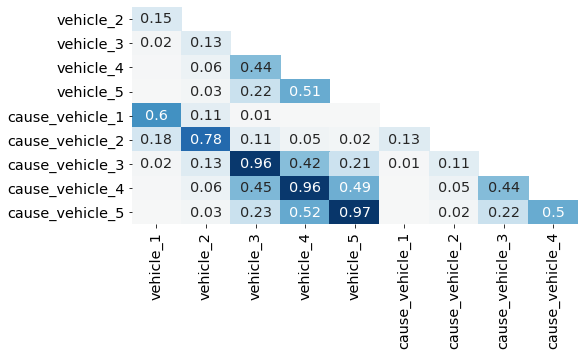

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(8,4))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    
col_name = [l for l in mvc.columns if "vehicle" in l]
plot_null_correlations(mvc[col_name])

In [85]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']
vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    vc_null_data.append([v, v_null, c_null])

vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [86]:
# find the most common value in all columns
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicles = mvc[v_cols]
vehicles = vehicles.stack()
top10_vehicles = vehicles.value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

In [87]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_mask = mvc[c_col].isnull() & mvc[v_col].notnull()
    mvc[v_col] = mvc[v_col].mask(v_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_mask, "Unspecified")

summary_after = summarize_missing()
print(summary_before, '\n')
print(summary_after)


   vehicle_number  vehicle_missing  cause_missing
0               1              204             24
1               2             3793            223
2               3              242             24
3               4               50              3
4               5               10              0 

   vehicle_number  vehicle_missing  cause_missing
0               1                0              0
1               2                0              0
2               3                0              0
3               4                0              0
4               5                0              0


In [88]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [89]:
print(location_data.isnull().sum())

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64


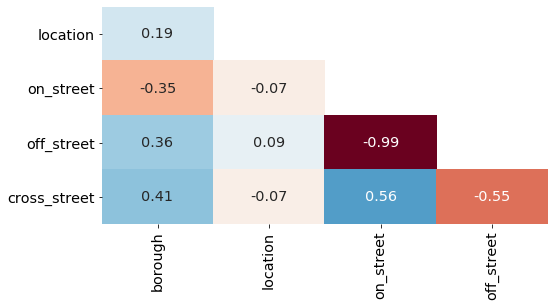

In [90]:
plot_null_correlations(location_data)

In [91]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


In [92]:
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
for col in location_cols:
    v_mask = mvc[col].isnull()
    mvc[col] = mvc[col].mask(v_mask, sup_data[col])

null_after = mvc[location_cols].isnull().sum()

print(null_before, '\n')
print(null_after)

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64 

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64
